In [1]:
from cryptocmd import CmcScraper
# Initialise scraper without time interval for max historical data
scraper = CmcScraper("BTRST")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [2]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-03-31,3.530874,3.620054,3.459750,3.484421,2765694.00,3.104568e+08
1,2022-03-30,3.422875,3.532193,3.401124,3.530569,2715283.65,3.145685e+08
2,2022-03-29,3.424506,3.465525,3.355122,3.423465,3793028.41,3.050256e+08
3,2022-03-28,3.361513,3.456708,3.323054,3.425057,3530651.58,3.051675e+08
4,2022-03-27,3.252230,3.361531,3.252230,3.360989,2640617.62,2.994591e+08
...,...,...,...,...,...,...,...
193,2021-09-19,17.900943,18.436870,15.791937,15.797530,17453778.18,0.000000e+00
194,2021-09-18,21.110870,21.342336,17.879866,17.879866,13985399.88,0.000000e+00
195,2021-09-17,26.847824,39.128979,21.059964,21.110367,19765436.70,0.000000e+00
196,2021-09-16,32.584953,47.852999,26.504759,26.793431,80866494.90,0.000000e+00


In [3]:
df['Token Supply'] = df['Market Cap']/df['Close']
df

,Date,Open,High,Low,Close,Volume,Market Cap,Token Supply
0,2022-03-31,3.530874,3.620054,3.459750,3.484421,2765694.00,3.104568e+08,8.909852e+07
1,2022-03-30,3.422875,3.532193,3.401124,3.530569,2715283.65,3.145685e+08,8.909852e+07
2,2022-03-29,3.424506,3.465525,3.355122,3.423465,3793028.41,3.050256e+08,8.909852e+07
3,2022-03-28,3.361513,3.456708,3.323054,3.425057,3530651.58,3.051675e+08,8.909852e+07
4,2022-03-27,3.252230,3.361531,3.252230,3.360989,2640617.62,2.994591e+08,8.909852e+07
...,...,...,...,...,...,...,...,...
193,2021-09-19,17.900943,18.436870,15.791937,15.797530,17453778.18,0.000000e+00,0.000000e+00
194,2021-09-18,21.110870,21.342336,17.879866,17.879866,13985399.88,0.000000e+00,0.000000e+00
195,2021-09-17,26.847824,39.128979,21.059964,21.110367,19765436.70,0.000000e+00,0.000000e+00
196,2021-09-16,32.584953,47.852999,26.504759,26.793431,80866494.90,0.000000e+00,0.000000e+00


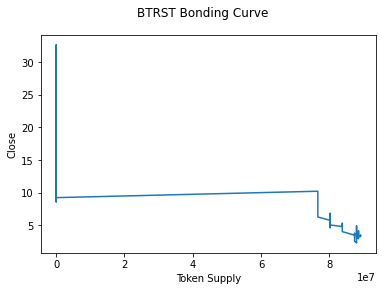

In [4]:
import matplotlib.pyplot as plt
x = df['Token Supply']
y = df['Close']
plt.suptitle("BTRST Bonding Curve")
plt.xlabel('Token Supply')
plt.ylabel('Close')
plt.plot(x, y)

In [5]:
df[df['Token Supply'] == 0].index[0]

169

In [6]:
df = df[0:df[df['Token Supply'] == 0].index[0]]
df

,Date,Open,High,Low,Close,Volume,Market Cap,Token Supply
0,2022-03-31,3.530874,3.620054,3.459750,3.484421,2765694.00,3.104568e+08,8.909852e+07
1,2022-03-30,3.422875,3.532193,3.401124,3.530569,2715283.65,3.145685e+08,8.909852e+07
2,2022-03-29,3.424506,3.465525,3.355122,3.423465,3793028.41,3.050256e+08,8.909852e+07
3,2022-03-28,3.361513,3.456708,3.323054,3.425057,3530651.58,3.051675e+08,8.909852e+07
4,2022-03-27,3.252230,3.361531,3.252230,3.360989,2640617.62,2.994591e+08,8.909852e+07
...,...,...,...,...,...,...,...,...
164,2021-10-18,9.156835,9.748027,9.145083,9.193010,4101649.36,7.041710e+08,7.659852e+07
165,2021-10-17,9.240207,9.302528,9.098253,9.156846,3520909.07,7.014008e+08,7.659852e+07
166,2021-10-16,9.442123,9.469518,9.212340,9.240320,6082925.92,7.077948e+08,7.659852e+07
167,2021-10-15,10.211148,10.216426,9.359892,9.442136,8292314.24,7.232536e+08,7.659852e+07


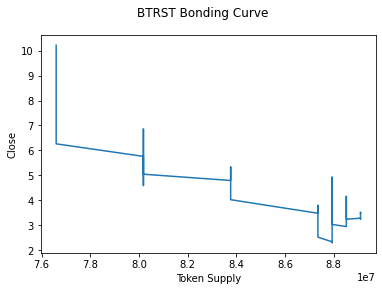

In [7]:
import matplotlib.pyplot as plt
x = df['Token Supply']
y = df['Close']
plt.suptitle("BTRST Bonding Curve")
plt.xlabel('Token Supply')
plt.ylabel('Close')
plt.plot(x, y)

In [8]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [9]:
index_list = []
for feature in ['Close', 'Token Supply']:
    index_list.extend(outliers(df, feature))

In [10]:
index_list

[161, 162, 163, 164, 165, 166, 167, 168]

In [11]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [12]:
df = remove(df, index_list)
df

,Date,Open,High,Low,Close,Volume,Market Cap,Token Supply
0,2022-03-31,3.530874,3.620054,3.459750,3.484421,2765694.00,3.104568e+08,8.909852e+07
1,2022-03-30,3.422875,3.532193,3.401124,3.530569,2715283.65,3.145685e+08,8.909852e+07
2,2022-03-29,3.424506,3.465525,3.355122,3.423465,3793028.41,3.050256e+08,8.909852e+07
3,2022-03-28,3.361513,3.456708,3.323054,3.425057,3530651.58,3.051675e+08,8.909852e+07
4,2022-03-27,3.252230,3.361531,3.252230,3.360989,2640617.62,2.994591e+08,8.909852e+07
...,...,...,...,...,...,...,...,...
156,2021-10-26,6.738612,6.757197,6.261313,6.265997,6251429.60,4.799661e+08,7.659852e+07
157,2021-10-25,6.395205,6.846444,6.395205,6.738784,6873828.28,5.161809e+08,7.659852e+07
158,2021-10-24,6.871303,7.031592,6.240135,6.394172,8830342.19,4.897841e+08,7.659852e+07
159,2021-10-23,7.130477,7.228783,6.756244,6.871327,9998923.36,5.263335e+08,7.659852e+07


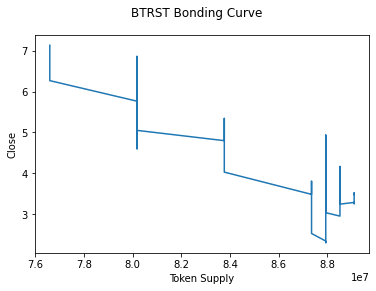

In [13]:
import matplotlib.pyplot as plt
x = df['Token Supply']
y = df['Close']
plt.suptitle("BTRST Bonding Curve")
plt.xlabel('Token Supply')
plt.ylabel('Close')
plt.plot(x, y)